This code will calculate the color indices (difference in magnitude between two filter bands) for U-B, B-V, V-R, and R-I as a function of temperature

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

In [13]:
from scipy import constants as c
# define the blackbody spectrum as a function
def planck(l,T):
    return 2*c.pi*c.h*(c.c)**2/(l**5) * (np.exp(c.h*c.c/(l*c.k*T))-1)**(-1)

In [30]:
# for each filter, at each temp, we will integrate the BB spectrum over lambda
from scipy import integrate as i

npoints = 100
# wavelength ranges come from known central, FWHM for each band
urange = np.linspace(360-70/2,360+70/2,npoints)*1e-9
brange = np.linspace(440-100/2,440+100/2,npoints)*1e-9
vrange = np.linspace(550-90/2,550+90/2,npoints)*1e-9
rrange = np.linspace(650-100/2,650+100/2,npoints)*1e-9
irange = np.linspace(800-150/2,800+150/2,npoints)*1e-9

# define the magnitude, integrating the BB spectrum over lambda for a given T
def mag(lrange,T):
    return -2.5 * np.log(i.quad(lambda l: planck(l,T),lrange[0],lrange[-1])[0])

In [37]:
# loop over temperature range
Ts = np.arange(3000,12000,200)

# empty color index arrays
u_b, b_v, v_r, r_i = [],[],[],[]

for T in Ts:
    m_u = mag(urange,T)
    m_b = mag(brange,T)
    m_v = mag(vrange,T)
    m_r = mag(rrange,T)
    m_i = mag(irange,T)
    
    u_b.append(m_u - m_b)
    b_v.append(m_b - m_v)
    v_r.append(m_v - m_r)
    r_i.append(m_r - m_i)

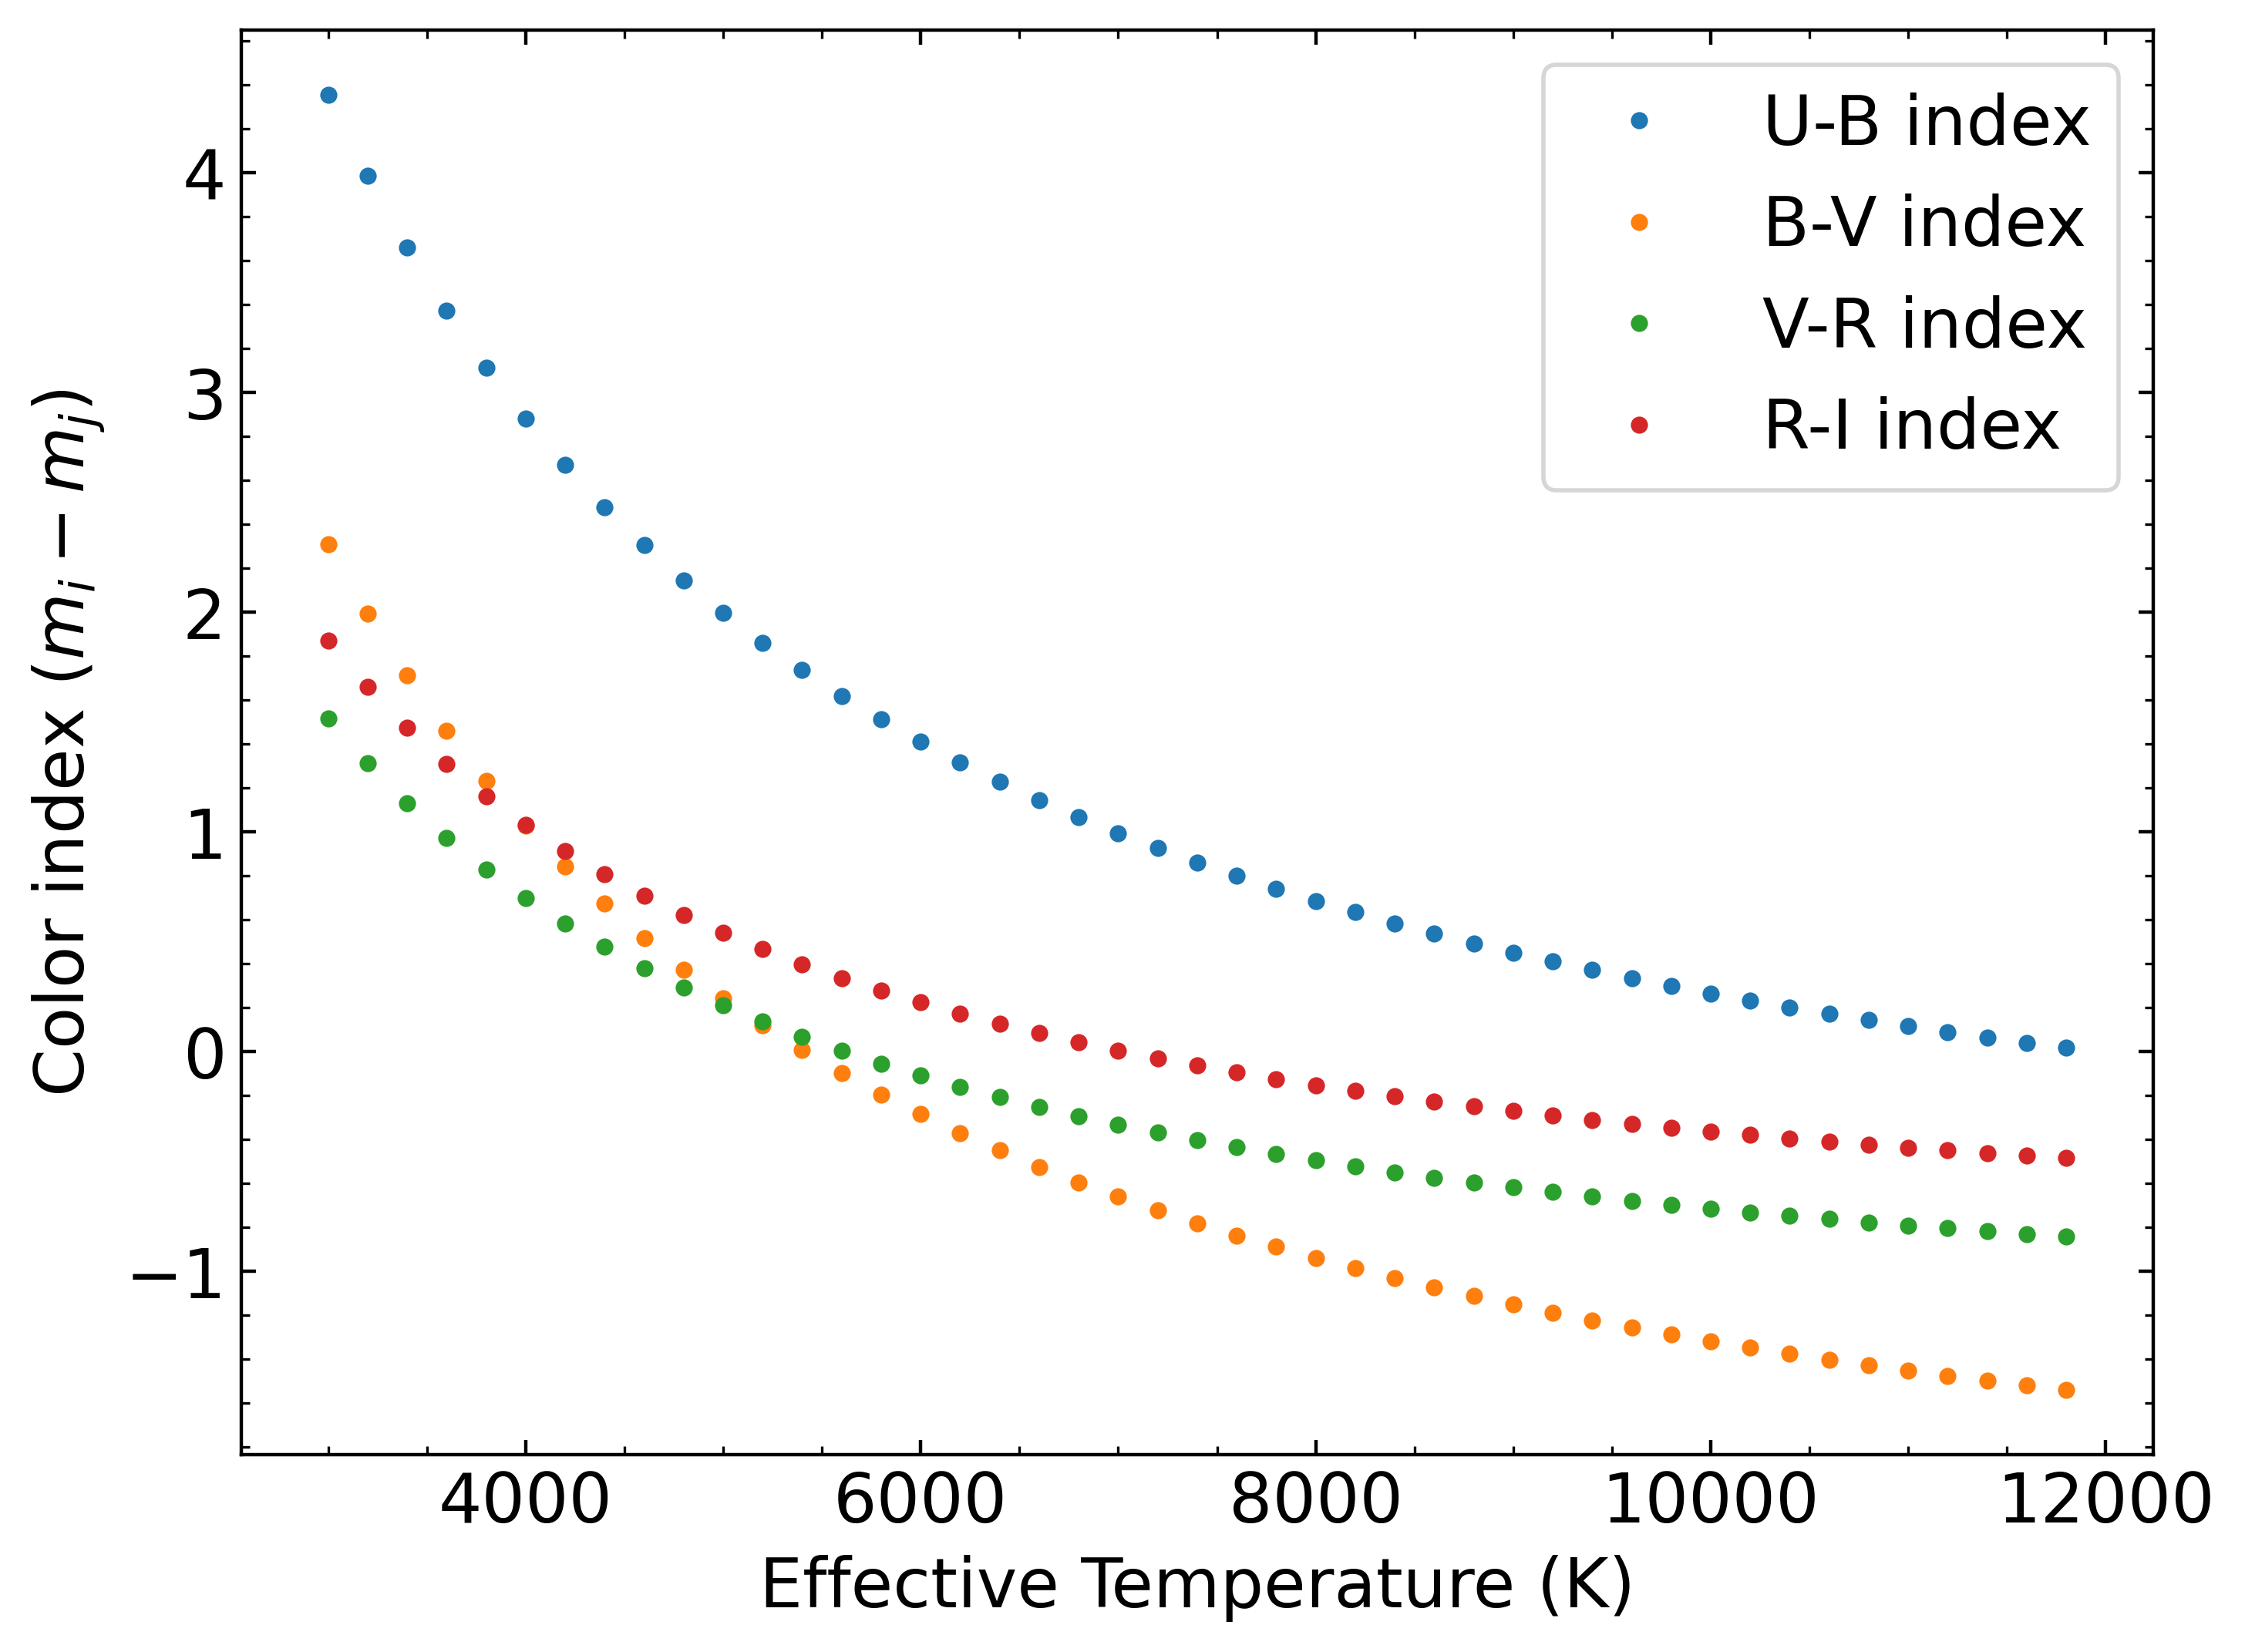

In [ ]:
# plot the color indices to make sure they make sense
plt.figure(figsize = (8,6),dpi=400)
plt.plot(Ts,u_b,linestyle='',marker='.',label='U-B index')
plt.plot(Ts,b_v,linestyle='',marker='.',label='B-V index')
plt.plot(Ts,v_r,linestyle='',marker='.',label='V-R index')
plt.plot(Ts,r_i,linestyle='',marker='.',label='R-I index')
plt.xlabel("Effective Temperature (K)")
plt.ylabel(r"Color index ($m_i - m_j$)")
plt.legend()

In [49]:
# print tables
array = [Ts,u_b,b_v,v_r,r_i,]

In [48]:
# write xlsxwriter to send data to an excel sheet for table reading
#!pip install xlsxwriter
import xlsxwriter

workbook = xlsxwriter.Workbook('/Users/chris/Desktop/bbcolors.xlsx')
worksheet = workbook.add_worksheet()

row = 0

for col, data in enumerate(array):
    worksheet.write_column(row, col, data)

workbook.close()